# Image Classification for Dog and Cat

In [ ]:
# Basic libs
import os
import numpy as np
from time import time

# Computer Vision lib:
import cv2
from keras.preprocessing.image import ImageDataGenerator

# Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Visualization
from PIL import Image
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.callbacks import TensorBoard

%matplotlib inline

## Exploratory Data Analysis
### Plotting using matplot lib

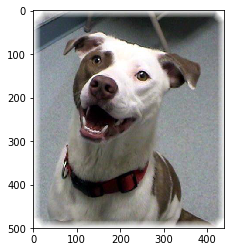

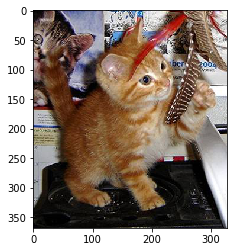

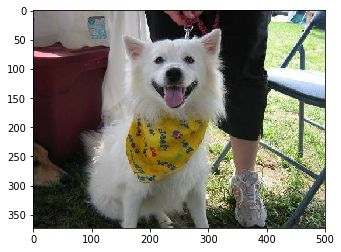

In [32]:
dc_list = ('training_set/dogs/dog.101.jpg', 'training_set/cats/cat.1008.jpg', 'training_set/dogs/dog.1124.jpg')
for i in dc_list:
    img=mpimg.imread(i)
    imgplot = plt.imshow(img)
    plt.show()

### Plotting using Image library:
This will display the image on the screen, not in the notebook.

In [20]:
for i in dc_list:
    image = Image.open(i)
    image.show()

### Plotting image using OpenCV
Base function in OpenCV display the image in gray scale. The color display function of OpenCV displaying the photo in BGR instead of RBG so before plotting the image, it's necessary to convert the color scale.

In [38]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(6, 6))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)

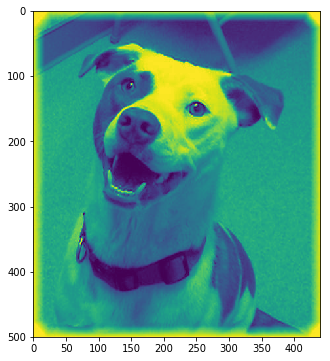

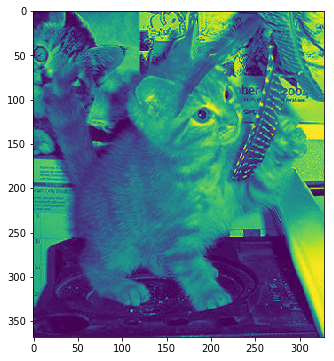

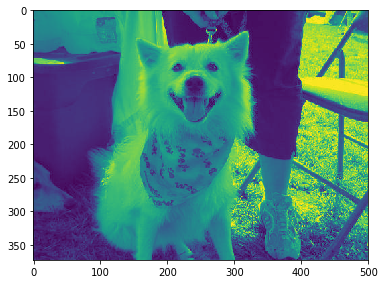

In [39]:
# Base function
for i in dc_list:
    img = cv2.imread(i,0)
    show(img)

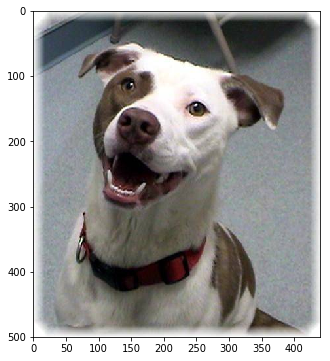

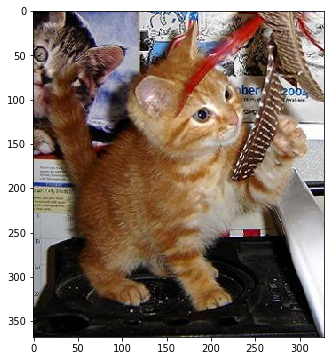

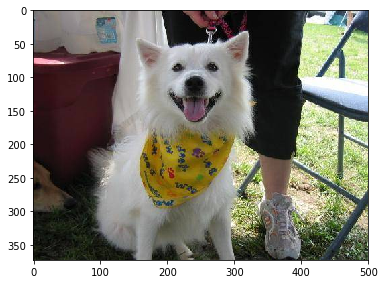

In [40]:
# Convert colors from BGR to RBG:
for i in dc_list:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    show(img)

### Exploring the type and size of each image:


 Shape of this image is (500, 440, 3)

 Type of this image is uint8


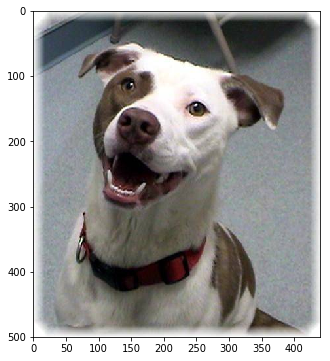

In [48]:
img = cv2.imread(dc_list[0])
print("\n Shape of this image is {}".format(img.shape))
print("\n Type of this image is {}".format(img.dtype))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show(img)

### Looking at the number of test and train data

In [64]:
def count_image(paths,name_type,list_name):
    """
    Function to count the number of image and print out the result
    
    """
    list_type = []
    for path in os.listdir(paths):
        if '.jpg' in path:
            list_type.append(os.path.join(paths, path))
    print("The number of {} photo in {} set is {}".format(name_type,list_name,len(list_type)))

In [65]:
# Counting the number of cat photo in training and testing set
count_image('training_set/cats',"cat","training")
count_image('test_set/cats',"cat","test")
count_image('training_set/dogs',"dog","training")
count_image('test_set/dogs',"dog","test")

The number of cat photo in training set is 4000
The number of cat photo in test set is 1011
The number of dog photo in training set is 2109
The number of dog photo in test set is 1012


In [ ]:
# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

## Load in training and test image

In [66]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 6112 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


## Modelling
- Starting with a base model: Convolution Neural Network
    - Convolution (activation: relu)
    - Max Pooling
    - Flattening
    - Full connection

In [72]:
# Using TensorBoard to track on accuracy/ loss and each steps inside Keras model.
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [68]:
# Creating a simple model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten()) # from 2D to 1D
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fit the training data
model.fit_generator(training_set, steps_per_epoch = 6000, epochs = 25, validation_data = test_set,
                   validation_steps = 2000, callbacks = [tensorboard])

Epoch 1/25
2284/6000 [==========>...................] - ETA: 8:40 - loss: 0.4874 - acc: 0.7632

In [ ]:
def predict_one_img(path):
    """
    """
    test_image = image.load_img(path, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'

test_list = ()

for i in test_list:
    img=mpimg.imread(i)
    imgplot = plt.imshow(img)
    plt.title("Predicted title is {}".format(predict_one_img(i)))
    plt.show()
    
    
# test_image = image.load_img('val_set/1.jpg', target_size = (64, 64))
# test_image = image.img_to_array(test_image)
# test_image = np.expand_dims(test_image, axis = 0)
# result = classifier.predict(test_image)
# training_set.class_indices
# if result[0][0] == 1:
# prediction = 'dog'
# else:
# prediction = 'cat'